# Lógica combinacional: Sumadores

Los sumadores son circuitos que operan sobre un número dado de bits para sumarlos. Estos se construyen a partir de compueras XOR.

In [1]:
def XOR(x,y):
    """
    Función XOR
    """
    return (x and not y) or (not x and y)

XOR(1,1)

False

## Half-Adder

![decodificador](https://media.geeksforgeeks.org/wp-content/cdn-uploads/Half_Adder.jpg)

In [2]:
class HalfAdder(object):
    """
    Simulador de circuito Half-Adder.
    """
    def __init__(self):
        self.suma = 0
        self.acarreo = 0
        
    def apply(self, x,y):
        #Suma con XOR
        self.suma = 1*XOR(x,y)
        #Acarreo xy
        self.acarreo = x*y
    
        return self.suma, self.acarreo

In [3]:
HA = HalfAdder()

for x in [0,1]:
    for y in [0,1]:
        print(x,y, HA.apply(x,y))

0 0 (0, 0)
0 1 (1, 0)
1 0 (1, 0)
1 1 (0, 1)


## Full-Adder

![fulladder](https://www.cs.drexel.edu/~src322/cs164/boolSec/imgs/fulladder.png)

In [4]:
class FullAdder(object):
    """
    Simulador de circuito Full-Adder.
    """
    def __init__(self):
        self.suma = 0
        self.accarreo = 0
        #Primer Half-Adder
        self.HA1 = HalfAdder()
        #Segundo Half-Adder
        self.HA2 = HalfAdder()
        
    def apply(self, x,y,z):
        #Aplica half-adder a entradas x,y
        self.HA1.apply(x,y)
        #Aplica half-adder a salida anterior y z
        self.HA2.apply(z,self.HA1.suma)
        
        #Gaurda la suma y el acarreo
        self.suma = self.HA2.suma
        self.acarreo = 1*(self.HA1.acarreo or self.HA2.acarreo)
        
        return self.suma, self.acarreo

In [5]:
FA = FullAdder()

for x in [0,1]:
    for y in [0,1]:
        for z in [0,1]:
            print(x,y,z, FA.apply(x,y,z))

0 0 0 (0, 0)
0 0 1 (1, 0)
0 1 0 (1, 0)
0 1 1 (0, 1)
1 0 0 (1, 0)
1 0 1 (0, 1)
1 1 0 (0, 1)
1 1 1 (1, 1)


## Sumador binario de 4 bits

![sumador](https://www.electronicshub.org/wp-content/uploads/2015/06/4-bit-adder.jpg)

In [6]:
class BinaryAdder(object):
    """
    Simulador de circuito sumador para 4 bits.
    """
    def __init__(self, c=0):
        self.suma = (0,0,0,0)
        self.acarreo = c
        #Se usan 4 full-adders, uno por cada bit.
        self.FA1 = FullAdder()
        self.FA2 = FullAdder()
        self.FA3 = FullAdder()
        self.FA4 = FullAdder()
        
    def sum(self, a1,a2,a3,a4, b1,b2,b3,b4):
        #Se aplican los full-adders de derecha a izquierda
        self.FA1.apply(a4,b4,self.acarreo)
        self.FA2.apply(a3,b3,self.FA1.acarreo)
        self.FA3.apply(a2,b2,self.FA2.acarreo)
        self.FA4.apply(a1,b1,self.FA3.acarreo)
        
        #Guarda la suma y el acarreo
        self.suma = (self.FA4.suma, self.FA3.suma, self.FA2.suma, self.FA1.suma)
        self.acarreo = self.FA4.acarreo
        
        return self.suma, self.acarreo

In [7]:
sumador = BinaryAdder(c=0)
a1,a2,a3,a4 = 0,1,1,1
b1,b2,b3,b4 = 1,0,0,1
result, c = sumador.sum(a1,a2,a3,a4, b1,b2,b3,b4)

print('Suma binario: {}\nAcarreo: {}'.format(sumador.suma, c))

Suma binario: (0, 0, 0, 0)
Acarreo: 1


## Sumador BCD

![bcdAdder](https://www.researchgate.net/profile/Vembu-Sumathy/publication/266486454/figure/fig2/AS:667641140240402@1536189460528/Block-Diagram-of-BCD-Adder.ppm)

In [8]:
class BCDAdder(object):
    """
    Simulador de circuito para sumador BCD.
    """
    def __init__(self, c=0):
        self.suma = (0,0,0,0)
        self.acarreo = c
        #Se utilizan dos sumadores binarios
        self.BinAdder1 = BinaryAdder(c=c)
        self.BinAdder2 = BinaryAdder(c=0)
        
    def sum(self, a1,a2,a3,a4, b1,b2,b3,b4):
        #Se aplica el primer sumador a las entradas
        (z1,z2,z3,z4), c_prev = self.BinAdder1.sum(a1,a2,a3,a4, b1,b2,b3,b4)
        #Se calcula el acarreo
        c = c_prev or z1*z2 or z1*z3
        #Se aplica el segundo sumador
        bcd_sum, c_none = self.BinAdder2.sum(z1,z2,z3,z4, 0,c,c,0,)
        
        #Se guarda la suma y el acarreo
        self.suma = bcd_sum
        self.acarreo = c
    
        return self.suma, self.acarreo
        

In [9]:
sumador_bcd = BCDAdder(c=0)
a1,a2,a3,a4 = 0,0,0,1
b1,b2,b3,b4 = 1,0,0,1
result, c = sumador_bcd.sum(a1,a2,a3,a4, b1,b2,b3,b4)

print('Suma binario: {}\nAcarreo: {}'.format(result, c))

Suma binario: (0, 0, 0, 0)
Acarreo: 1


#### Sumador BCD con displayer

In [10]:
import matplotlib.pyplot as plt
from NumberDisplayer import display

class DecimalAdder(object):
    """
    Simulador de un circuito para sumar bcd con displayer decimal.
    """
    def __init__(self, c=0):
        self.suma = (0,0,0,0)
        self.acarreo = c
        #Sumador BCD
        self.Adder = BCDAdder(c=c)
        #Recupera código binario de decimales
        self.digits = {0:(0,0,0,0), 1:(0,0,0,1), 2:(0,0,1,0), 3:(0,0,1,1), 4:(0,1,0,0), 5:(0,1,0,1),
                       6:(0,1,1,0), 7:(0,1,1,1), 8:(1,0,0,0), 9:(1,0,0,1)}
        #Displayer para los decimales
        self.displayer = display
    
    def sum(self, d1, d2):
        #Transforma los inputs en binarios
        a1,a2,a3,a4 = self.digits[d1]
        b1,b2,b3,b4 = self.digits[d2]
        
        #Realiza la suma
        self.suma, self.acarreo = self.Adder.sum(a1,a2,a3,a4, b1,b2,b3,b4)
        
        #Aplica el display decimal a los digitos binarios
        display_acarreo = self.displayer((0,0,0,self.acarreo))
        display_suma = self.displayer(self.suma)
        fig, (ax1, ax2) = plt.subplots(1,2, figsize=(1,1))
        ax1.imshow(display_acarreo, cmap='Greys')
        ax1.axis('off')
        ax2.imshow(display_suma, cmap='Greys')
        ax2.axis('off')
        plt.show()

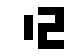

In [11]:
sumador = DecimalAdder(c=0)
sumador.sum(5,7)

Suma de 0 + 0


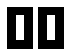

Suma de 0 + 1


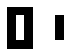

Suma de 0 + 2


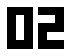

Suma de 0 + 3


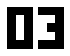

Suma de 0 + 4


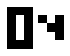

Suma de 0 + 5


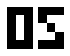

Suma de 0 + 6


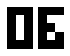

Suma de 0 + 7


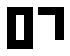

Suma de 0 + 8


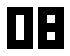

Suma de 0 + 9


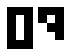

Suma de 1 + 0


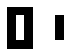

Suma de 1 + 1


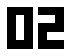

Suma de 1 + 2


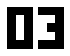

Suma de 1 + 3


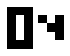

Suma de 1 + 4


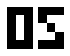

Suma de 1 + 5


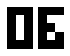

Suma de 1 + 6


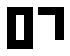

Suma de 1 + 7


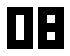

Suma de 1 + 8


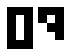

Suma de 1 + 9


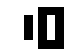

Suma de 2 + 0


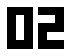

Suma de 2 + 1


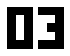

Suma de 2 + 2


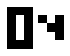

Suma de 2 + 3


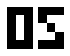

Suma de 2 + 4


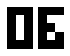

Suma de 2 + 5


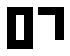

Suma de 2 + 6


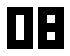

Suma de 2 + 7


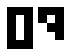

Suma de 2 + 8


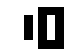

Suma de 2 + 9


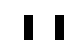

Suma de 3 + 0


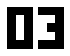

Suma de 3 + 1


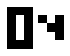

Suma de 3 + 2


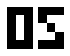

Suma de 3 + 3


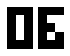

Suma de 3 + 4


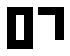

Suma de 3 + 5


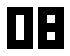

Suma de 3 + 6


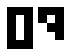

Suma de 3 + 7


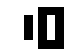

Suma de 3 + 8


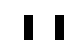

Suma de 3 + 9


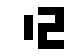

Suma de 4 + 0


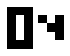

Suma de 4 + 1


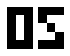

Suma de 4 + 2


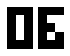

Suma de 4 + 3


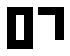

Suma de 4 + 4


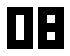

Suma de 4 + 5


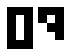

Suma de 4 + 6


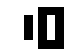

Suma de 4 + 7


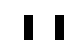

Suma de 4 + 8


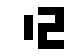

Suma de 4 + 9


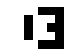

Suma de 5 + 0


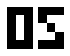

Suma de 5 + 1


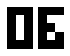

Suma de 5 + 2


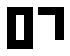

Suma de 5 + 3


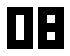

Suma de 5 + 4


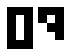

Suma de 5 + 5


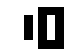

Suma de 5 + 6


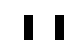

Suma de 5 + 7


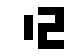

Suma de 5 + 8


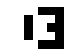

Suma de 5 + 9


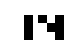

Suma de 6 + 0


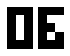

Suma de 6 + 1


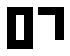

Suma de 6 + 2


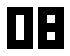

Suma de 6 + 3


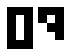

Suma de 6 + 4


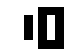

Suma de 6 + 5


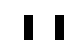

Suma de 6 + 6


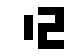

Suma de 6 + 7


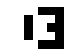

Suma de 6 + 8


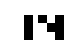

Suma de 6 + 9


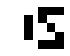

Suma de 7 + 0


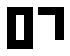

Suma de 7 + 1


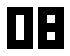

Suma de 7 + 2


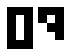

Suma de 7 + 3


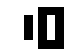

Suma de 7 + 4


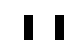

Suma de 7 + 5


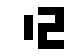

Suma de 7 + 6


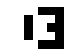

Suma de 7 + 7


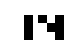

Suma de 7 + 8


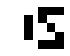

Suma de 7 + 9


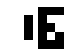

Suma de 8 + 0


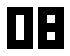

Suma de 8 + 1


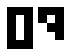

Suma de 8 + 2


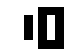

Suma de 8 + 3


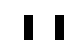

Suma de 8 + 4


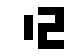

Suma de 8 + 5


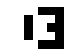

Suma de 8 + 6


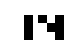

Suma de 8 + 7


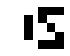

Suma de 8 + 8


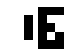

Suma de 8 + 9


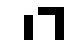

Suma de 9 + 0


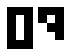

Suma de 9 + 1


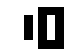

Suma de 9 + 2


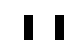

Suma de 9 + 3


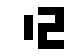

Suma de 9 + 4


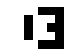

Suma de 9 + 5


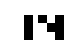

Suma de 9 + 6


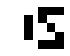

Suma de 9 + 7


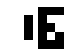

Suma de 9 + 8


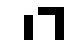

Suma de 9 + 9


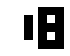

In [12]:
for i in range(0,10):
    for j in range(0,10):
        print('Suma de {} + {}'.format(i,j))
        sumador = DecimalAdder(c=0)
        sumador.sum(i,j)